In [0]:
from google.colab import drive
drive.mount('/content/Drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive
Drive  sample_data


In [0]:
import os
os.getcwd()

os.chdir('/content/Drive/My Drive/Colab Notebooks/Augmented1')

!ls  

history.json  Test  Training  Validation  vgg16_2.h5  weights.best.hdf5


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (150, 150, 3)

#Instantiate an empty model
conv_base = Sequential([

Conv2D(64, (3, 3), input_shape=input_shape, padding= 'same', activation= 'relu'),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

])

In [0]:
conv_base.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 256)      

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir ='/content/Drive/My Drive/Colab Notebooks/Augmented1'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2597)
validation_features, validation_labels = extract_features(validation_dir,1558)
test_features, test_labels = extract_features(test_dir, 1045)

Found 2597 images belonging to 2 classes.
Found 1558 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2597, 4*4* 512))
validation_features = np.reshape(validation_features, (1558, 4*4* 512))
test_features = np.reshape(test_features, (1045, 4*4* 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers
import keras

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4* 4 * 512))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
  loss='binary_crossentropy',
  metrics=['acc'])

history = model.fit(train_features, train_labels,
  epochs=30,
  batch_size=20,
  validation_data=(validation_features, validation_labels)
)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
Train on 2597 samples, validate on 1558 samples
Epoch 1/30
2597/2597 [==============================] - 1s 451us/step - loss: 0.6926 - acc: 0.5333 - val_loss: 0.6922 - val_acc: 0.5353
Epoch 2/30
2597/2597 [==============================] - 1s 345us/step - lo

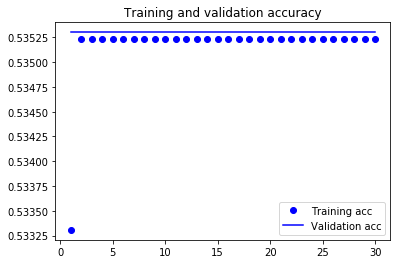

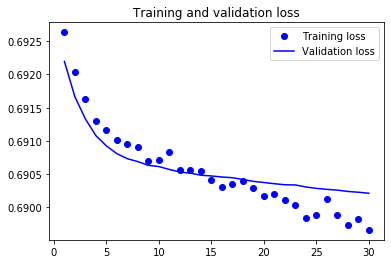

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20)

Found 2597 images belonging to 2 classes.
Found 1558 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 47s 469ms/step - loss: 0.6934 - acc: 0.5252 - val_loss: 0.6929 - val_acc: 0.5300
Epoch 2/30
100/100 [==============================] - 44s 438ms/step - loss: 0.6914 - acc: 0.5460 - val_loss: 0.6941 - val_acc: 0.5075
Epoch 3/30
100/100 [==============================] - 43s 428ms/step - loss: 0.6909 - acc: 0.5419 - val_loss: 0.6821 - val_acc: 0.5675
Epoch 4/30
100/100 [==============================] - 43s 431ms/step - loss: 0.6930 - acc: 0.5239 - val_loss: 0.6881 - val_acc: 0.5678
Epoch 5/30
100/100 [==============================] - 44s 436ms/step - loss: 0.6890 - acc: 0.5360 - val_loss: 0.6896 - val_acc: 0.5350
Epoch 6/30
100/100 [==============================] - 43s 433ms/step - loss: 0.6907 - acc: 0.5307 - val_loss: 0.6857 - val_acc: 0.5375
Epoch 7/30
100/100 [==============================] - 43s 431ms/step - loss: 0.6888 - acc: 0.5200 - val_lo

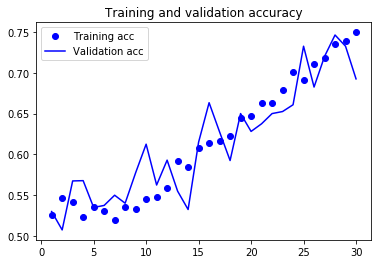

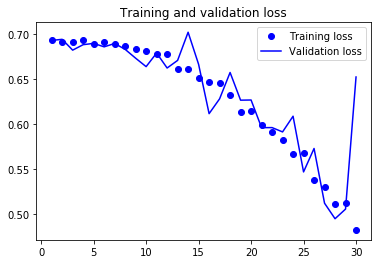

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
conv_base.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 256)      

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1045 images belonging to 2 classes.
test acc: 0.67700000166893


In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("Raw VGG16.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')


model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks = [checkpoint, early])


Epoch 1/50
100/100 [==============================] - 49s 488ms/step - loss: 0.3936 - acc: 0.8189 - val_loss: 0.4263 - val_acc: 0.8020

Epoch 00001: val_acc improved from -inf to 0.80200, saving model to Raw VGG16.h5
Epoch 2/50
100/100 [==============================] - 45s 447ms/step - loss: 0.3905 - acc: 0.8217 - val_loss: 0.4079 - val_acc: 0.8196

Epoch 00002: val_acc improved from 0.80200 to 0.81964, saving model to Raw VGG16.h5
Epoch 3/50
100/100 [==============================] - 45s 446ms/step - loss: 0.3825 - acc: 0.8315 - val_loss: 0.4084 - val_acc: 0.8030

Epoch 00003: val_acc did not improve from 0.81964
Epoch 4/50
100/100 [==============================] - 45s 448ms/step - loss: 0.3725 - acc: 0.8415 - val_loss: 0.3986 - val_acc: 0.8357

Epoch 00004: val_acc improved from 0.81964 to 0.83567, saving model to Raw VGG16.h5
Epoch 5/50
100/100 [==============================] - 45s 447ms/step - loss: 0.3790 - acc: 0.8352 - val_loss: 0.4207 - val_acc: 0.7956

Epoch 00005: val_acc 

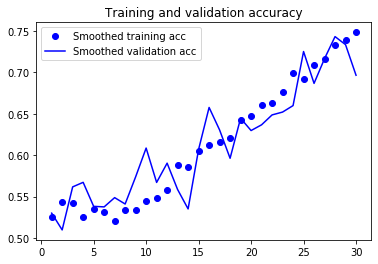

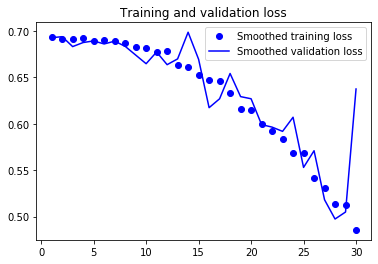

In [0]:
def smooth_curve(points, factor=0.1):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
  smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
  smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
  smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
  smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 1045 images belonging to 2 classes.
test acc: 0.8674999952316285


In [0]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("Raw VGG16.h5")

    # image path
    img_path = '/content/Drive/My Drive/Colab Notebooks/data01/Test/mdb226.jpg'    # benign
    # img_path = '/content/Drive/My Drive/Colab Notebooks/data01/Test/mdb241.jpg'      # malignant

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)
    print (pred)

[[0.00164255]]
